In [1]:
from models import *
from samplers import *
from tasks import ChebyshevKernelLinearRegression, ChebyshevKernelLeastSquaresModelWithRidge,PolynomialSharedRoots
from matplotlib import pyplot as plt
import numpy as np
import os
from eval import *

(1, 5)
torch.Size([1, 128])
PROMPT:  tensor([[[0.8780],
         [0.2667],
         [0.6316],
         [0.1222],
         [0.2461],
         [0.2790],
         [0.1855],
         [0.5919],
         [0.0491],
         [0.2303],
         [0.6466],
         [0.8643],
         [0.3806],
         [0.7971],
         [1.0124],
         [0.5402],
         [0.1190],
         [0.5609],
         [0.0393],
         [0.0984]]], grad_fn=<UnsafeViewBackward0>)
Orthogonal component:  tensor(17.5956, grad_fn=<CopyBackwards>)
total norm:  tensor(42.0283, grad_fn=<CopyBackwards>)
ALL XS SHAPE tensor([[[ 0.4638],
         [-0.0382],
         [-0.3118],
         [-0.4496],
         [ 0.2284],
         [-0.8529],
         [ 0.5660],
         [ 0.1552],
         [-0.2530],
         [-0.5904],
         [ 0.6199],
         [-0.4648],
         [-0.7322],
         [-0.4724],
         [ 0.6068],
         [-0.3055],
         [ 0.6605],
         [ 0.2014],
         [ 0.8942],
         [ 0.0694],
         [-0.7587],

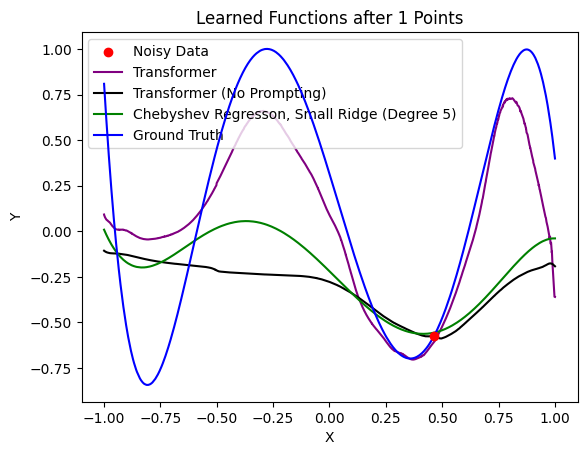

ZS Shape:  torch.Size([2, 14, 128])
INDS:  tensor([0, 1, 2, 3, 4, 5, 6])
ZS Shape:  torch.Size([1, 14, 128])
INDS:  tensor([0, 1, 2, 3, 4, 5, 6])
ZS Shape:  torch.Size([1, 14, 128])
INDS:  tensor([0, 1, 2, 3, 4, 5, 6])
ZS Shape:  torch.Size([1, 14, 128])
INDS:  tensor([0, 1, 2, 3, 4, 5, 6])
ZS Shape:  torch.Size([2, 14, 128])
INDS:  tensor([0, 1, 2, 3, 4, 5, 6])
ZS Shape:  torch.Size([1, 14, 128])
INDS:  tensor([0, 1, 2, 3, 4, 5, 6])
ZS Shape:  torch.Size([2, 14, 128])
INDS:  tensor([0, 1, 2, 3, 4, 5, 6])
ZS Shape:  torch.Size([1, 14, 128])
INDS:  tensor([0, 1, 2, 3, 4, 5, 6])
ZS Shape:  torch.Size([2, 14, 128])
INDS:  tensor([0, 1, 2, 3, 4, 5, 6])
ZS Shape:  torch.Size([2, 14, 128])
INDS:  tensor([0, 1, 2, 3, 4, 5, 6])
ZS Shape:  torch.Size([2, 14, 128])
INDS:  tensor([0, 1, 2, 3, 4, 5, 6])
ZS Shape:  torch.Size([1, 14, 128])
INDS:  tensor([0, 1, 2, 3, 4, 5, 6])
ZS Shape:  torch.Size([1, 14, 128])
INDS:  tensor([0, 1, 2, 3, 4, 5, 6])
ZS Shape:  torch.Size([1, 14, 128])
INDS:  tensor([

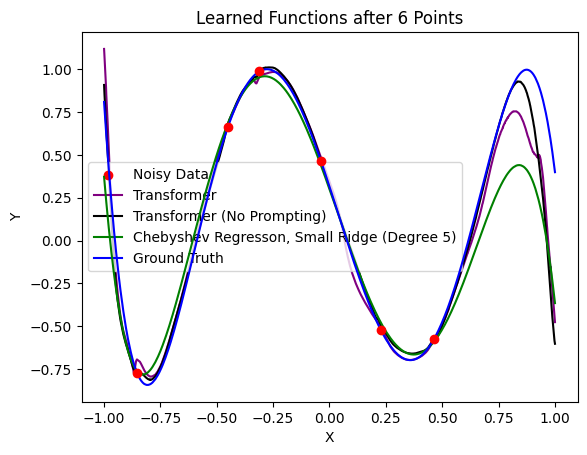

ZS Shape:  torch.Size([2, 24, 128])
INDS:  tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
ZS Shape:  torch.Size([1, 24, 128])
INDS:  tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
ZS Shape:  torch.Size([1, 24, 128])
INDS:  tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
ZS Shape:  torch.Size([1, 24, 128])
INDS:  tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
ZS Shape:  torch.Size([2, 24, 128])
INDS:  tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
ZS Shape:  torch.Size([1, 24, 128])
INDS:  tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
ZS Shape:  torch.Size([2, 24, 128])
INDS:  tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
ZS Shape:  torch.Size([1, 24, 128])
INDS:  tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
ZS Shape:  torch.Size([2, 24, 128])
INDS:  tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
ZS Shape:  torch.Size([2, 24, 128])
INDS:  tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])


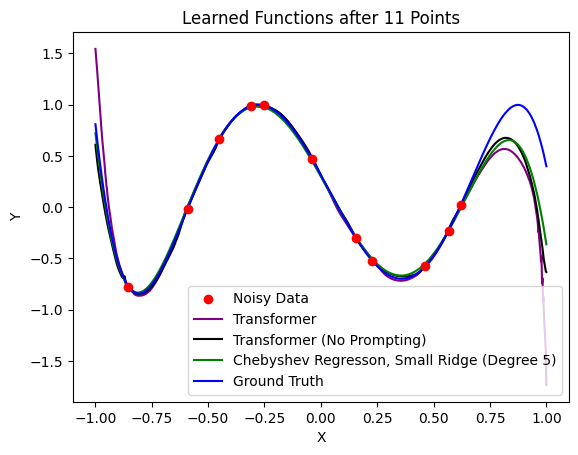

ZS Shape:  torch.Size([2, 34, 128])
INDS:  tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])
ZS Shape:  torch.Size([1, 34, 128])
INDS:  tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])
ZS Shape:  torch.Size([1, 34, 128])
INDS:  tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])
ZS Shape:  torch.Size([1, 34, 128])
INDS:  tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])
ZS Shape:  torch.Size([2, 34, 128])
INDS:  tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])
ZS Shape:  torch.Size([1, 34, 128])
INDS:  tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])
ZS Shape:  torch.Size([2, 34, 128])
INDS:  tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])
ZS Shape:  torch.Size([1, 34, 128])
INDS:  tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])
ZS Shape:  torch.Size([2, 34, 128])
INDS

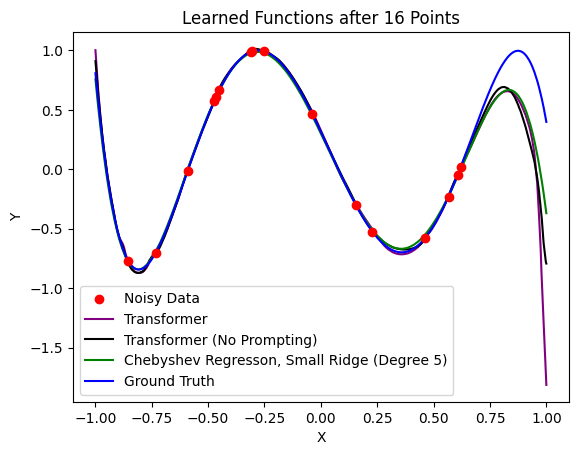

ZS Shape:  torch.Size([2, 44, 128])
INDS:  tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21])
ZS Shape:  torch.Size([1, 44, 128])
INDS:  tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21])
ZS Shape:  torch.Size([1, 44, 128])
INDS:  tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21])
ZS Shape:  torch.Size([1, 44, 128])
INDS:  tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21])
ZS Shape:  torch.Size([2, 44, 128])
INDS:  tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21])
ZS Shape:  torch.Size([1, 44, 128])
INDS:  tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21])
ZS Shape:  torch.Size([2, 44, 128])
INDS:  tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 1

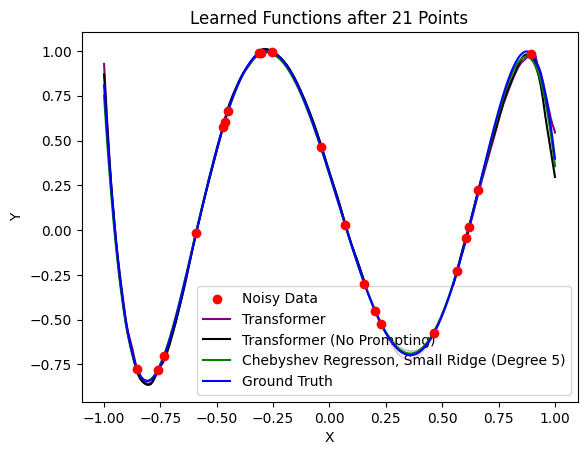

ZS Shape:  torch.Size([2, 54, 128])
INDS:  tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26])
ZS Shape:  torch.Size([1, 54, 128])
INDS:  tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26])
ZS Shape:  torch.Size([1, 54, 128])
INDS:  tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26])
ZS Shape:  torch.Size([1, 54, 128])
INDS:  tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26])
ZS Shape:  torch.Size([2, 54, 128])
INDS:  tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26])
ZS Shape:  torch.Size([1, 54, 128])
INDS:  tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 2

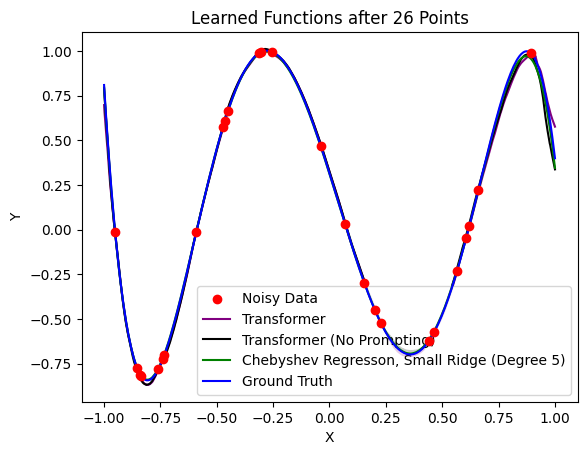

/opt/conda/conda-bld/pytorch_1646755903507/work/aten/src/ATen/native/cuda/Indexing.cu:703: indexSelectLargeIndex: block: [83,0,0], thread: [32,0,0] Assertion `srcIndex < srcSelectDimSize` failed.
/opt/conda/conda-bld/pytorch_1646755903507/work/aten/src/ATen/native/cuda/Indexing.cu:703: indexSelectLargeIndex: block: [83,0,0], thread: [33,0,0] Assertion `srcIndex < srcSelectDimSize` failed.
/opt/conda/conda-bld/pytorch_1646755903507/work/aten/src/ATen/native/cuda/Indexing.cu:703: indexSelectLargeIndex: block: [83,0,0], thread: [34,0,0] Assertion `srcIndex < srcSelectDimSize` failed.
/opt/conda/conda-bld/pytorch_1646755903507/work/aten/src/ATen/native/cuda/Indexing.cu:703: indexSelectLargeIndex: block: [83,0,0], thread: [35,0,0] Assertion `srcIndex < srcSelectDimSize` failed.
/opt/conda/conda-bld/pytorch_1646755903507/work/aten/src/ATen/native/cuda/Indexing.cu:703: indexSelectLargeIndex: block: [83,0,0], thread: [36,0,0] Assertion `srcIndex < srcSelectDimSize` failed.
/opt/conda/conda-bld

RuntimeError: The size of tensor a (82) must match the size of tensor b (84) at non-singleton dimension 3

/conda-bld/pytorch_1646755903507/work/aten/src/ATen/native/cuda/Indexing.cu:703: indexSelectLargeIndex: block: [83,0,0], thread: [11,0,0] Assertion `srcIndex < srcSelectDimSize` failed.
/opt/conda/conda-bld/pytorch_1646755903507/work/aten/src/ATen/native/cuda/Indexing.cu:703: indexSelectLargeIndex: block: [83,0,0], thread: [12,0,0] Assertion `srcIndex < srcSelectDimSize` failed.
/opt/conda/conda-bld/pytorch_1646755903507/work/aten/src/ATen/native/cuda/Indexing.cu:703: indexSelectLargeIndex: block: [83,0,0], thread: [13,0,0] Assertion `srcIndex < srcSelectDimSize` failed.
/opt/conda/conda-bld/pytorch_1646755903507/work/aten/src/ATen/native/cuda/Indexing.cu:703: indexSelectLargeIndex: block: [83,0,0], thread: [14,0,0] Assertion `srcIndex < srcSelectDimSize` failed.
/opt/conda/conda-bld/pytorch_1646755903507/work/aten/src/ATen/native/cuda/Indexing.cu:703: indexSelectLargeIndex: block: [83,0,0], thread: [15,0,0] Assertion `srcIndex < srcSelectDimSize` failed.
/opt/conda/conda-bld/pytorch_1

In [2]:
sampler = UniformSampler(n_dims=1)
#TODO: Sampling looks a little sus, not so uniform
#task = ChebyshevKernelLinearRegression(n_dims=1, batch_size=1, basis_dim=6, different_degrees=False, lowest_degree=9, highest_degree=9)
task = PolynomialSharedRoots(n_dims=1, batch_size=1, basis_dim=1, degree=5)
run_id = "soft-prompting-test-6"  # if you train more models, replace with the run_id from the table above
run_dir = "../models"
task_name = "soft_prompting"
run_id_no_prompt= "small-1-11-5M-steps"
task_name_no_prompt = "kernel_linear_regression"
run_path = os.path.join(run_dir, task_name, run_id)
run_path_no_prompt = os.path.join(run_dir, task_name_no_prompt, run_id_no_prompt)
model, conf = get_model_from_run(run_path, -1)
model_no_prompt, conf_no_prompt = get_model_from_run(run_path_no_prompt, -1)
transformer_model = model.cuda().eval()
transformer_model_no_prompt = model_no_prompt.cuda().eval()
more_xs_for_graphing_truth = sampler.sample_xs(1000, 1)
extra_indices = np.argsort(more_xs_for_graphing_truth.squeeze())
all_xs = sampler.sample_xs(40, 1)
print("ALL XS SHAPE", all_xs)
extra_ys = task.evaluate(more_xs_for_graphing_truth, noise=False)
extra_ys = extra_ys.squeeze()
extra_ys = extra_ys[extra_indices]
all_ys = task.evaluate(all_xs, noise=False)
model = ChebyshevKernelLeastSquaresModelWithRidge(basis_dim=5, ridge=0.1)
#model_no_ridge = ChebyshevKernelLeastSquaresModelWithRidge(basis_dim=9, ridge=0.5)
#model_low_degree = ChebyshevKernelLeastSquaresModelWithRidge(basis_dim=3, ridge=0.5)
for i in range(1, 41, 5):
    xs = all_xs[:,:i,:]
    ys = all_ys[:,:i]
    extra_transformer_estimated = get_imputed_ys(transformer_model, task, xs, ys, more_xs_for_graphing_truth, noise=False, smoothing=0)
    extra_transformer_no_prompt_estimated = get_imputed_ys(transformer_model_no_prompt, task, xs, ys, more_xs_for_graphing_truth, noise=False, smoothing=0)
    extra_predicted = model.return_trained_model(xs, ys)(more_xs_for_graphing_truth)
    #no_ridge_predicted = model_no_ridge.return_trained_model(xs, ys)(more_xs_for_graphing_truth)
    #low_degree_predicted = model_low_degree.return_trained_model(xs, ys)(more_xs_for_graphing_truth)
    #low_degree_predicted = low_degree_predicted.squeeze()[extra_indices]
    extra_predicted = extra_predicted.squeeze()[extra_indices]
    extra_transformer_estimated = extra_transformer_estimated.squeeze()[extra_indices]
    extra_transformer_no_prompt_estimated = extra_transformer_no_prompt_estimated.squeeze()[extra_indices]
    #no_ridge_predicted = no_ridge_predicted.squeeze()[extra_indices]
    graphing_x = more_xs_for_graphing_truth.squeeze()[extra_indices]
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.title('Learned Functions after ' + str(i) + ' Points')
    ax.scatter(xs.squeeze(), ys.squeeze(), color='red', label='Noisy Data',zorder=3000)
    ax.plot(graphing_x, extra_transformer_estimated, color='purple', label='Transformer')
    ax.plot(graphing_x, extra_transformer_no_prompt_estimated, color='black', label='Transformer (No Prompting)')
    ax.plot(graphing_x, extra_predicted, color='green', label='Chebyshev Regresson, Small Ridge (Degree 5)', zorder=1000)
    ax.plot(graphing_x, extra_ys, color='blue', label='Ground Truth',zorder=2000)
    #ax.plot(graphing_x, low_degree_predicted, color='orange', label='Chebyshev Regresson (Degree 3)', zorder=500)
    #ax.plot(graphing_x, no_ridge_predicted, color='orange', label='Chebyshev Regresson (Degree 9)')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend()
    plt.savefig('polynomials/chebyshev_kernel_regression_' + str(i) + '.png')
    plt.show()


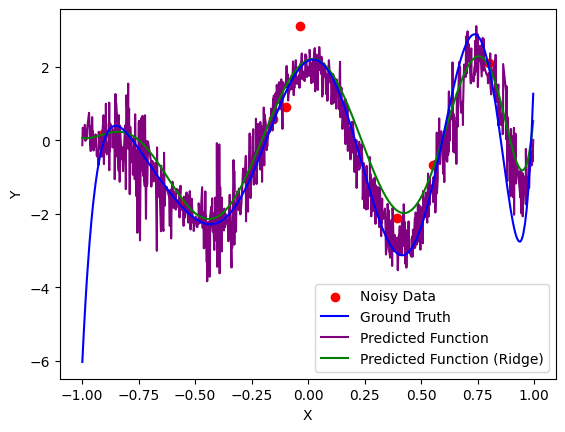

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(xs, ys, color='red', label='Noisy Data')
ax.plot(more_xs_for_graphing_truth, extra_ys, color='blue', label='Ground Truth', zorder=1000)
ax.plot(more_xs_for_graphing_truth, extra_transformer_estimated, color='purple', label='Predicted Function')
ax.plot(more_xs_for_graphing_truth, extra_predicted, color='green', label='Predicted Function (Ridge)', zorder=500)
#ax.plot(more_xs_for_graphing_truth, no_ridge_predicted, color='orange', label='Predicted Function (No Ridge)')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
plt.show()